# 라이브러리 호출, 파일 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('trip.csv')

# 데이터 정보 확인

In [3]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


### <예상>  
일반적인 범주에서는 다음과 같은 관계가 성립될 것이다.  
1. 승객(passenger_count)을 많이 태울수록 운임 요금이 증가할 것이다.
2. 거리가 증가할수록 운임 요금이 증가할 것이다.
3. 거리가 증가할수록 톨비가 증가할 것이다.
4. 팁은 거래 수단과 관련이 있을 것이다. (Cash를 사용하면 팁을 줄 확률이 높다?)
5. 이용 시간(pickup 시간과 dropoff 시간의 차이)가 길수록 운임 요금이 증가할 것이다.

In [5]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


passenger_count (max = 36), fare_amount (max = 999.99), tip_amount (max = 200) 에 이상치가 있는 듯 함...  
tolls_amount는 밑에서 좀 더 심층 분석하고 판단

# 중복값 확인 및 제거

In [6]:
# 중복값 확인
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [7]:
# 중복값 제거
data = data.drop_duplicates()

# 불필요한 컬럼 삭제
passenger_name은 아무런 영향을 미치지 못하므로 삭제

In [8]:
taxi = data.copy()

taxi.drop(['passenger_name'], axis = 1, inplace = True)

In [9]:
taxi

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


# 결측치 탐지

In [10]:
taxi.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [11]:
taxi.isna().mean()   # fare_amount에 0.00132% 결측치

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [12]:
# 결측치를 포함하는 행을 반환

taxi[taxi.isna().any(axis = 1)]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [13]:
taxi.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22699.000000,22699.000000,22696.000000,22699.000000,22699.000000
mean,1.643641,2.913313,13.023681,1.835781,0.312542
std,1.304986,3.653171,13.240551,2.800626,1.399212
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


 큰 영향을 미치는 값은 없어 보임.  

# 결측치 삭제

결측치를 포함하는 행의 비율이 너무 작으므로 삭제

In [14]:
# 결측치를 포함하는 행을 제거
taxi.dropna(subset = ['fare_amount'], inplace = True)

# 행이 삭제되었는지 확인
taxi.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

# Numerical data의 이상치 탐지

In [15]:
# 숫자형 데이터 확인

taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22696 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22696 non-null  object 
 1   tpep_dropoff_datetime  22696 non-null  object 
 2   payment_method         22696 non-null  object 
 3   passenger_count        22696 non-null  int64  
 4   trip_distance          22696 non-null  float64
 5   fare_amount            22696 non-null  float64
 6   tip_amount             22696 non-null  float64
 7   tolls_amount           22696 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.6+ MB


현재 ```passenger_count```, ```trip_distance```, ```fare_amount```, ```tip_amount```, ```tolls_amount```가 numerical data.

In [16]:
taxi.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000
mean,1.643638,2.912231,13.023681,1.835363,0.312329
std,1.305027,3.651483,13.240551,2.800182,1.398834
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


이상치가 있는 것처럼 보였던 ```passenger_count (max = 36)```, ```fare_amount (max = 999.99)```, ```tip_amount (max = 200)```에 대해 plotting.  

Text(0.5, 1.0, 'Passenger Count')

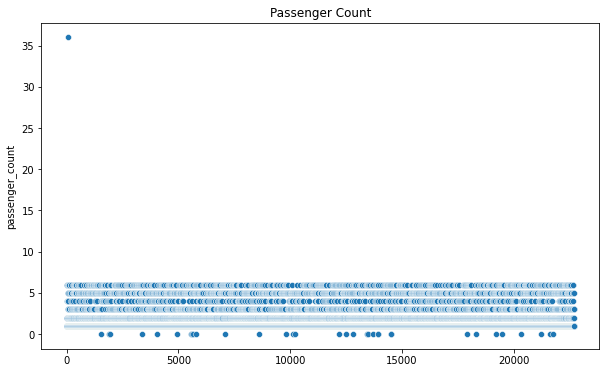

In [17]:
# passenger_count scatter plot

plt.figure(figsize = (10, 6))
sns.scatterplot(x= taxi.index, y = taxi['passenger_count'])
plt.title('Passenger Count')

이상치 제외하고는 값이 다 고만고만해서 scatterplot보다 box plot으로 그리는 게 더 좋을 듯.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Passenger Count')

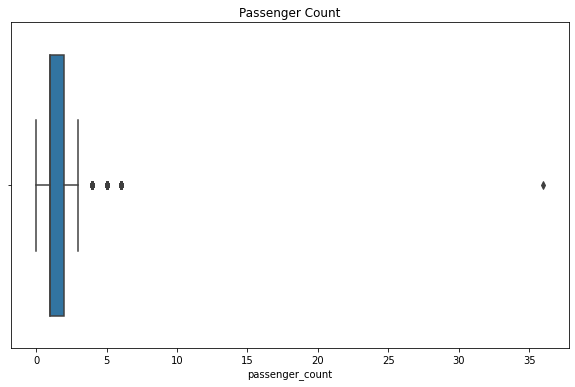

In [18]:
# passenger_count box plot

plt.figure(figsize = (10, 6))
sns.boxplot(taxi['passenger_count'])
plt.title('Passenger Count')

passenger_count의 max값은 확실한 이상치로 판명.  
10 이하의 값만 남기면 될 듯.

Text(0.5, 1.0, 'Fare Amount')

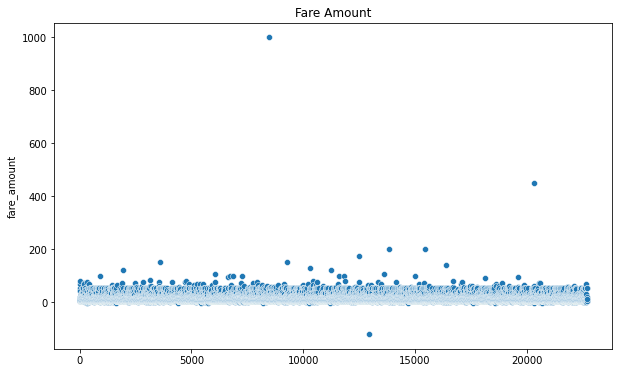

In [19]:
# Fare amount scatter plot

plt.figure(figsize = (10, 6))
sns.scatterplot(x= taxi.index, y = taxi['fare_amount'])
plt.title('Fare Amount')

fare_amount가 음수인 값, 450~ 정도 되어보이는 값, 1000에 가까운 값이 이상치인듯.  
0 이상 300 이하의 값만 남기면 될 것 같음.

*__❓체크포인트:  
distance가 기본요금 거리가 아닌데 fare amount가 0인 데이터가 있을까? (나중에 확인)__*

Text(0.5, 1.0, 'Tip Amount')

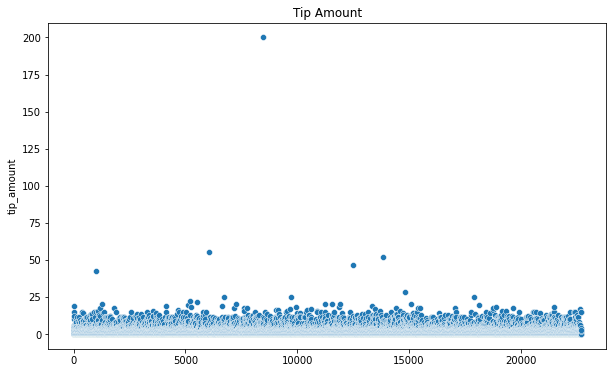

In [20]:
# Tip amount scatter plot

plt.figure(figsize = (10, 6))
sns.scatterplot(x= taxi.index, y = taxi['tip_amount'])
plt.title('Tip Amount')

Tip이 200이 넘는 건 이상치일 수도 있지만, 그냥 한 손님이 팁을 굉장히 많이 준 것일 수도 있음. 애매...

Text(0.5, 1.0, 'Trip Distance')

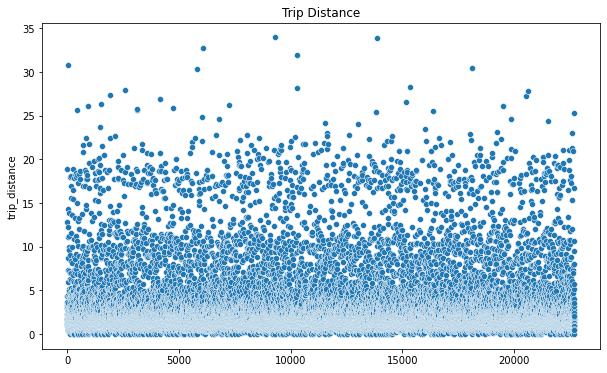

In [21]:
# 참고: trip_distance도 plotting 해보자.

plt.figure(figsize = (10, 6))
sns.scatterplot(x= taxi.index, y = taxi['trip_distance'])
plt.title('Trip Distance')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


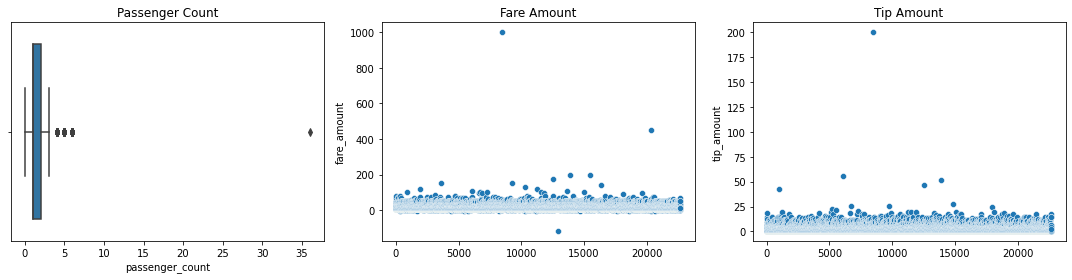

In [22]:
# 세 데이터를 하나의 그래프로 그려 보기

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 첫 번째 서브플롯: passenger_count box plot
sns.boxplot(taxi['passenger_count'], ax=axes[0])
axes[0].set_title('Passenger Count')

# 두 번째 서브플롯: Fare amount scatter plot
sns.scatterplot(x=taxi.index, y=taxi['fare_amount'], ax=axes[1])
axes[1].set_title('Fare Amount')

# 세 번째 서브플롯: Tip amount scatter plot
sns.scatterplot(x=taxi.index, y=taxi['tip_amount'], ax=axes[2])
axes[2].set_title('Tip Amount')

# 전체 그래프 표시
plt.tight_layout()
plt.show()

다소 애매했던 ```tolls_amount```도 살펴보자.

Text(0.5, 1.0, 'Tolls Amount')

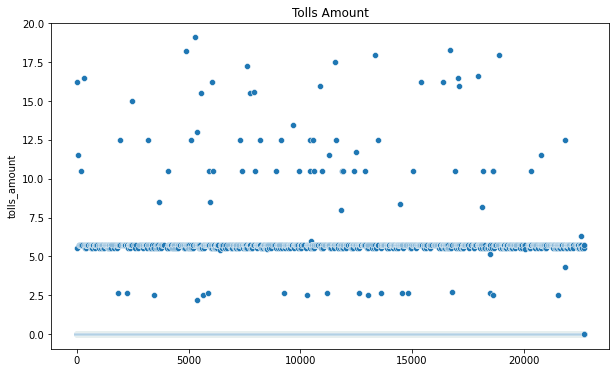

In [23]:
# Tolls amount scatter plot

plt.figure(figsize = (10, 6))
sns.scatterplot(x= taxi.index, y = taxi['tolls_amount'])
plt.title('Tolls Amount')

max값을 이상치라고 판단하기는 어려워보인다.

# Numerical data 이상치 제거(필터링)

확실하게 이상치로 보이는 아래의 값들을 제외해보자.  

제외해야 할 이상치들:
1. passenger_count의 max값 (35)
2. fare_amount가 음수인 값, 450~ 정도 되어보이는 값, 1000에 가까운 값

In [24]:
# 1. passenger_count의 이상치 제거 (10 이하의 값만 남기기)

taxi_pre = taxi.copy()

taxi_pre = taxi_pre[taxi['passenger_count'] <= 10]
taxi_pre

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [25]:
# 필터링된 데이터 확인

taxi_pre.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22695.000000,22695.00000,22695.000000,22695.000000,22695.000000
mean,1.642124,2.91235,13.023307,1.835444,0.312343
std,1.284973,3.65152,13.240724,2.800217,1.398863
min,0.000000,0.00000,-120.000000,0.000000,0.000000
25%,1.000000,0.99000,6.500000,0.000000,0.000000
50%,1.000000,1.61000,9.500000,1.350000,0.000000
75%,2.000000,3.06000,14.500000,2.450000,0.000000
max,6.000000,33.96000,999.990000,200.000000,19.100000


In [26]:
# 2. fare_amount의 이상치 제거 (0 이상 300 이하의 값만 남기기)

#taxi_pre = taxi_pre[0<= taxi_pre['fare_amount'] <= 300]

여기서 에러 발생:  
ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().  

파이썬에서는 데이터 프레임을 필터링할 때는 연쇄 조건을 사용할 수 없다고 함.  
각 조건을 별도로 지정하고 AND 연산자로 결합해야 함.

Text(0.5, 1.0, 'Fare Amount (filtering)')

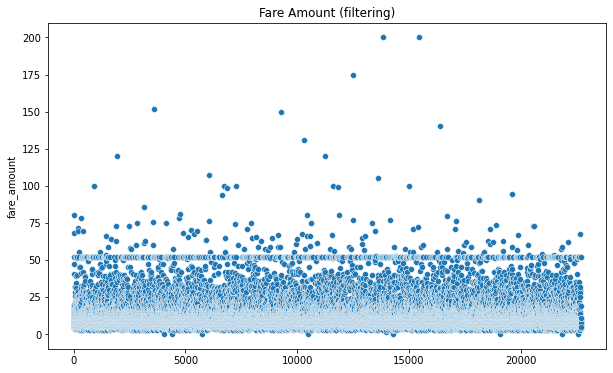

In [27]:
taxi_pre = taxi_pre[(taxi_pre['fare_amount'] >= 0) & (taxi_pre['fare_amount'] <= 300)]

# 데이터 확인
plt.figure(figsize = (10, 6))
sns.scatterplot(x= taxi_pre.index, y = taxi_pre['fare_amount'])
plt.title('Fare Amount (filtering)')

# Numerical data plotting

In [28]:
taxi_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22679 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22679 non-null  object 
 1   tpep_dropoff_datetime  22679 non-null  object 
 2   payment_method         22679 non-null  object 
 3   passenger_count        22679 non-null  int64  
 4   trip_distance          22679 non-null  float64
 5   fare_amount            22679 non-null  float64
 6   tip_amount             22679 non-null  float64
 7   tolls_amount           22679 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.6+ MB


위에서 예상했던 사항들을 분석해보자.  

1. 승객(passenger_count)을 많이 태울수록 운임 요금이 증가할 것이다.
2. 거리가 증가할수록 운임 요금이 증가할 것이다.
3. 거리가 증가할수록 톨비가 증가할 것이다.
4. 팁은 거래 수단과 관련이 있을 것이다. (Cash를 사용하면 팁을 줄 확률이 높다?)
5. 이용 시간(pickup 시간과 dropoff 시간의 차이)가 길수록 운임 요금이 증가할 것이다.

### 1. 승객(passenger_count)을 많이 태울수록 운임 요금이 증가할 것이다?

In [29]:
# passenger_count
print('가장 많이 태운 승객의 수: {}명'.format(taxi_pre['passenger_count'].max()))
print('가장 적게 태운 승객의 수: {}명'.format(taxi_pre['passenger_count'].min()))
print('평균 승객 수: {}명'.format(round(taxi_pre['passenger_count'].mean(), 2)))

print('\n')

# fare_amount
print('가장 높은 운임 비용: {}'.format(taxi_pre['fare_amount'].max()))
print('가장 적은 운임 비용: {}'.format(taxi_pre['fare_amount'].min()))
print('평균 운임 비용: {}원'.format(round(taxi_pre['fare_amount'].mean(), 2)))

가장 많이 태운 승객의 수: 6명
가장 적게 태운 승객의 수: 0명
평균 승객 수: 1.64명


가장 높은 운임 비용: 200.01
가장 적은 운임 비용: 0.0
평균 운임 비용: 12.98원


In [30]:
taxi_pre['fare_amount'].value_counts()

6.0      1163
6.5      1089
5.5      1081
7.0      1067
7.5      1018
         ... 
150.0       1
58.0        1
131.0       1
99.5        1
16.8        1
Name: fare_amount, Length: 177, dtype: int64

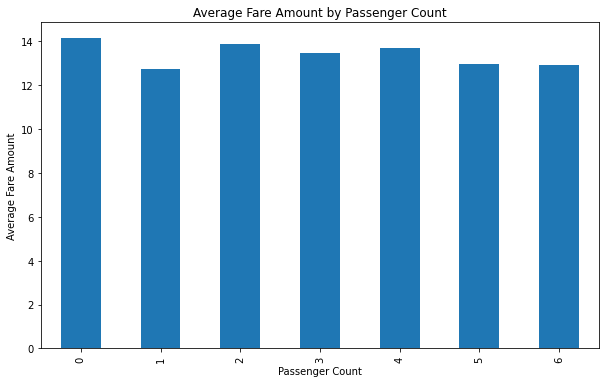

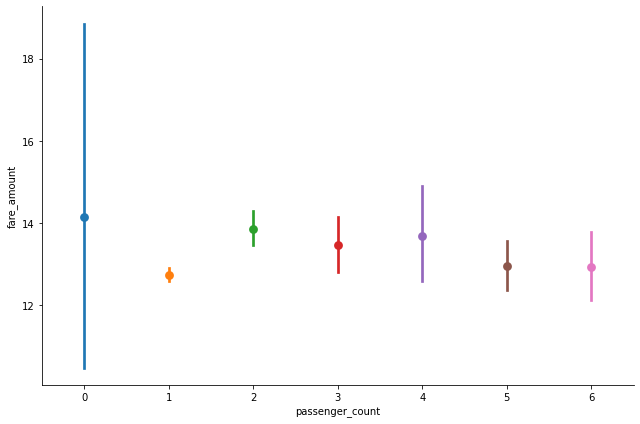

In [31]:
# passenger_count 별로 fare_amount의 평균 계산
fare_means = taxi_pre.groupby('passenger_count')['fare_amount'].mean()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
fare_means.plot(kind='bar')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Passenger Count')
plt.show()

sns.catplot(x='passenger_count', y='fare_amount', hue = 'passenger_count', data=taxi_pre, kind='point', height=6, aspect=1.5)

승객 수가 0명인데 운임이 계산되었고, 에러바도 매우 크다. 자세히 살펴보자.

In [32]:
taxi_pre[['passenger_count', 'fare_amount']].groupby(['passenger_count'], as_index = True).count()

,fare_amount
passenger_count,
0,33
1,16104
2,3302
3,952
4,455
5,1142
6,691


In [33]:
# 전체 데이터 수 확인

taxi_pre['fare_amount'].count()

22679

In [34]:
# passenger_count = 0인 fare_amount의 비율

print(str(round((33/22679) * 100, 2)), '%')

0.15 %


In [35]:
# passenger_count = 0인 fare_amount의 value 확인
fare_amount_passenger_0 = taxi_pre[taxi_pre['passenger_count'] == 0]['fare_amount']

fare_amount_passenger_0.value_counts()

6.5     3
12.5    3
11.5    3
7.0     3
9.0     2
18.0    2
4.5     1
14.5    1
16.0    1
10.0    1
21.0    1
6.0     1
9.5     1
4.0     1
33.0    1
8.5     1
77.2    1
23.5    1
34.0    1
8.0     1
15.5    1
5.0     1
10.5    1
Name: fare_amount, dtype: int64

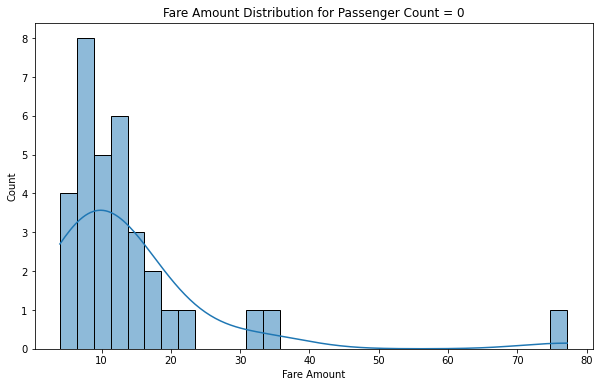

In [36]:
# passenger_count가 0인 데이터 필터링
fare_amount_passenger_0 = taxi_pre[taxi_pre['passenger_count'] == 0]['fare_amount']

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(fare_amount_passenger_0, bins=30, kde=True)
plt.xlabel('Fare Amount')
plt.title('Fare Amount Distribution for Passenger Count = 0')
plt.show()

In [37]:
fare_amount_passenger_0 = taxi_pre[taxi_pre['passenger_count'] == 0]['fare_amount']

print('승객이 0명일 때 가장 높은 운임 비용: {}'.format(fare_amount_passenger_0.max()))
print('승객이 0명일 때 가장 적은 운임 비용: {}'.format(fare_amount_passenger_0.min()))
print('승객이 0명일 때 평균 운임 비용: {}원'.format(round(fare_amount_passenger_0.mean(), 2)))

승객이 0명일 때 가장 높은 운임 비용: 77.2
승객이 0명일 때 가장 적은 운임 비용: 4.0
승객이 0명일 때 평균 운임 비용: 14.16원


승객 수가 0명일 때 운임을 낸 비율은 0.15%로 적으나, 최소 비용이 4.0에서 최대 비용이 77.2로 그 범위가 매우 크다.  
이 경우 승객이 없는 대신 물건을 운반하는 경우, 혹은 (드물긴 하나) 승객이 잠시 자리를 비운 상황을 고려해 볼 수 있다.  
그러나 이는 특수 상황에 가까우므로 '승객이 1명 이상이 타고 있어야 하는 상태'를 가정하여 추후 분석을 진행할 것이다.

In [38]:
# 승객이 0명인 데이터 제거

taxi_pre = taxi_pre[taxi_pre['passenger_count'] >= 1]
taxi_pre['passenger_count'].value_counts()

1    16104
2     3302
5     1142
3      952
6      691
4      455
Name: passenger_count, dtype: int64

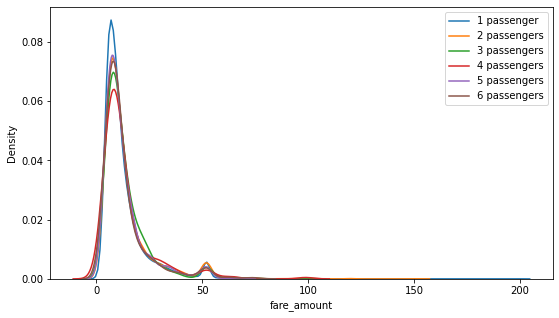

In [39]:
# 승객 수에 따른 운임 확인

fig, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 1]['fare_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 2]['fare_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 3]['fare_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 4]['fare_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 5]['fare_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 6]['fare_amount'], ax = ax)

plt.legend(['1 passenger', '2 passengers', '3 passengers', '4 passengers', '5 passengers', '6 passengers'])
plt.show()

승객 수 증가에 따른 운임 증가는 크게 관찰되지 않는다. 다만 승객 수와 상관없이 대부분 거의 비슷한 운임을 지불했다.

### 2. 거리가 증가할수록 운임 요금이 증가할 것이다?

In [40]:
taxi_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22646 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22646 non-null  object 
 1   tpep_dropoff_datetime  22646 non-null  object 
 2   payment_method         22646 non-null  object 
 3   passenger_count        22646 non-null  int64  
 4   trip_distance          22646 non-null  float64
 5   fare_amount            22646 non-null  float64
 6   tip_amount             22646 non-null  float64
 7   tolls_amount           22646 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.6+ MB


In [41]:
# passenger_count
print('가장 먼 거리: {}'.format(taxi_pre['trip_distance'].max()))
print('가장 가까운 거리: {}'.format(taxi_pre['trip_distance'].min()))
print('평균 거리: {}'.format(round(taxi_pre['trip_distance'].mean(), 2)))

가장 먼 거리: 33.96
가장 가까운 거리: 0.0
평균 거리: 2.91


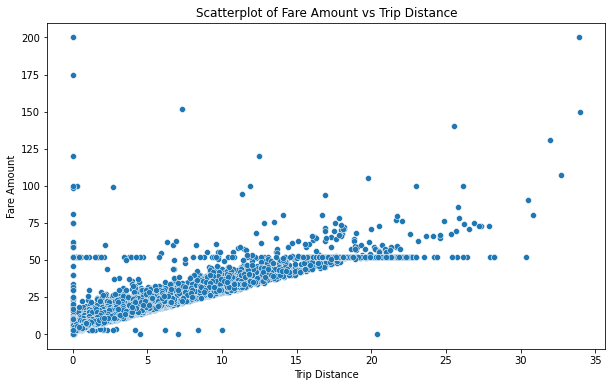

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=taxi_pre)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Scatterplot of Fare Amount vs Trip Distance')
plt.show()

이동 거리가 0이지만 운임이 발생하는 경우와 거리에 상관없이 50 정도의 운임이 빈번하게 발생하는 것처럼 보인다.  
또, 거리와 상관 없이 0에 가까운 운임을 낸 경우도 있는 것 같다.
비율을 확인해 보자.

In [43]:
# trip_distance가 0인 데이터 필터링
zero_distance = taxi_pre[taxi_pre['trip_distance'] == 0]

# 필터링된 데이터에 대해 fare_amount의 개수 세기
zero_distance['fare_amount'].count()

145

In [44]:
taxi_pre.isna().count()

tpep_pickup_datetime     22646
tpep_dropoff_datetime    22646
payment_method           22646
passenger_count          22646
trip_distance            22646
fare_amount              22646
tip_amount               22646
tolls_amount             22646
dtype: int64

In [45]:
print(str(round((145/22646)*100, 2)), '%')

0.64 %


In [46]:
# 운임이 50 정도인 데이터 필터링
fifty_fare = taxi_pre[(taxi_pre['fare_amount'] >= 50) & (taxi_pre['fare_amount'] <= 55)] 

# 필터링된 데이터에 대해 fare_amount의 개수 세기
fifty_fare['fare_amount'].value_counts(ascending = True)

54.7      1
54.5      1
54.0      2
53.0      3
52.5      4
51.5      6
55.0      6
50.0      7
51.0      7
50.5      9
52.0    514
Name: fare_amount, dtype: int64

In [47]:
print(str(round((514/22646)*100, 2)), '%')

2.27 %


두 경우 모두 비율이 크지 않으므로 두 경우 모두에 대해 데이터를 제거한다.

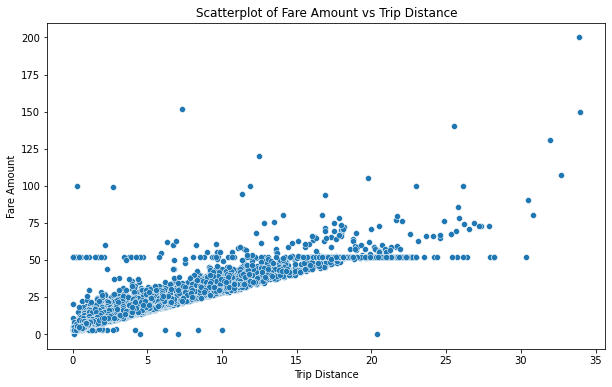

In [48]:
# 거리가 0인 데이터 제거
taxi_pre = taxi_pre[taxi_pre['trip_distance'] > 0]

# 데이터 확인
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=taxi_pre)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Scatterplot of Fare Amount vs Trip Distance')
plt.show()

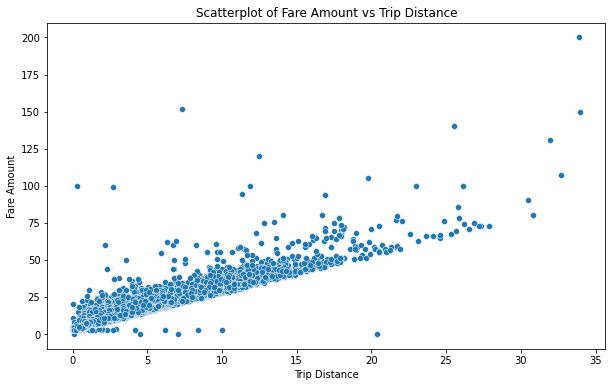

In [49]:
# 거리가 52.0인 데이터 제거.
taxi_pre = taxi_pre[(taxi_pre['fare_amount'] != 52.0)]

# 결과 확인을 위한 scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=taxi_pre)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Scatterplot of Fare Amount vs Trip Distance')
plt.show()

몇몇 이상치를 제외하고는 거리가 증가할수록 운임 요금은 증가한다.

### 3. 거리가 증가할수록 톨비가 증가할 것이다?

In [50]:
taxi_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22003 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22003 non-null  object 
 1   tpep_dropoff_datetime  22003 non-null  object 
 2   payment_method         22003 non-null  object 
 3   passenger_count        22003 non-null  int64  
 4   trip_distance          22003 non-null  float64
 5   fare_amount            22003 non-null  float64
 6   tip_amount             22003 non-null  float64
 7   tolls_amount           22003 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.5+ MB


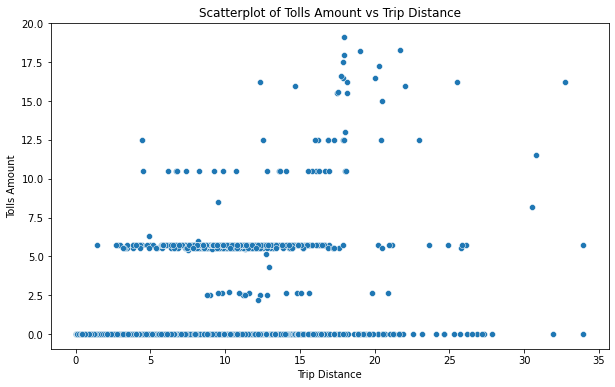

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tolls_amount', data=taxi_pre)
plt.xlabel('Trip Distance')
plt.ylabel('Tolls Amount')
plt.title('Scatterplot of Tolls Amount vs Trip Distance')
plt.show()

거리와 톨비는 큰 상관관계가 없다.  
또한, 이동거리가 긴 데 비해 톨비가 적은 경우 의심할 수는 있겠으나, 톨게이트가 없는 곳으로 이동했을 가능성이 있으므로 이상치로 판단하지 않을 것이다.

아래 조건은 object 데이터들이므로, object 데이터를 처리한 뒤 확인한다.

4. 팁은 거래 수단과 관련이 있을 것이다. (Cash를 사용하면 팁을 줄 확률이 높다?)
5. 이용 시간(pickup 시간과 dropoff 시간의 차이)가 길수록 운임 요금이 증가할 것이다.

# object 데이터 다루기

In [52]:
taxi_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22003 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22003 non-null  object 
 1   tpep_dropoff_datetime  22003 non-null  object 
 2   payment_method         22003 non-null  object 
 3   passenger_count        22003 non-null  int64  
 4   trip_distance          22003 non-null  float64
 5   fare_amount            22003 non-null  float64
 6   tip_amount             22003 non-null  float64
 7   tolls_amount           22003 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.5+ MB


In [53]:
# object 자료형을 갖는 데이터들만 추출
taxi_obj = taxi_pre[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_method']]
taxi_obj

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card
...,...,...,...
22695,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,Cash
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card


datetime들은 추후 수정해보기로 하고, payment_method에 어떤 값들이 있는지 살펴보자.

In [54]:
# payment_method가 갖는 값들을 추출

taxi_obj['payment_method'].value_counts()

Cash           10857
Debit Card      5598
Credit Card     5548
Name: payment_method, dtype: int64

Debit Card는 직불카드로, 우리나라의 체크카드와 동일한 개념이다. Credit Card는 신용카드이며,  
카드를 사용하는 지불 방식은 동일하므로 두 지불 방식 모두를 "Card"라는 이름으로 변경한다.

In [55]:
# Debit Card와 Credit Card를 Card로 변경

taxi_pre['payment_method'] = taxi_pre['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card'})
taxi_pre['payment_method'].value_counts()

Card    11146
Cash    10857
Name: payment_method, dtype: int64

값이 바뀌었다.
이제 예상이 실제 데이터와 일치하는지 확인해보자.

### 4. 팁은 거래 수단과 관련이 있을 것이다? (Cash를 사용하면 팁을 줄 확률이 높다?)

In [56]:
taxi_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22003 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22003 non-null  object 
 1   tpep_dropoff_datetime  22003 non-null  object 
 2   payment_method         22003 non-null  object 
 3   passenger_count        22003 non-null  int64  
 4   trip_distance          22003 non-null  float64
 5   fare_amount            22003 non-null  float64
 6   tip_amount             22003 non-null  float64
 7   tolls_amount           22003 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.5+ MB


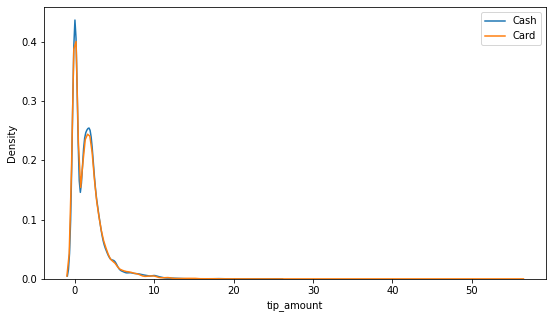

In [57]:
# 결제 수단에 따른 팁 확인

fig, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(taxi_pre[taxi_pre['payment_method'] == 'Cash']['tip_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['payment_method'] == 'Card']['tip_amount'], ax = ax)

plt.legend(['Cash', 'Card'])
plt.show()

결제 수단에 따른 차이는 없다.  


In [58]:
taxi_pre['tip_amount'].value_counts()

0.00     7774
1.00     1447
2.00      750
1.50      301
3.00      232
         ... 
7.16        1
2.13        1
2.47        1
7.43        1
17.08       1
Name: tip_amount, Length: 699, dtype: int64

일반적으로는 팁을 아예 주지 않거나, 주더라도 1~2만큼 주는 것을 확인할 수 있다.

거리가 멀수록 팁을 많이 주는지도 확인해보자.

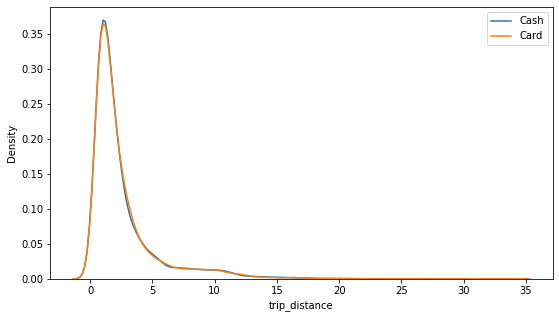

In [59]:
# 결제 수단에 따른 팁 확인

fig, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(taxi_pre[taxi_pre['payment_method'] == 'Cash']['trip_distance'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['payment_method'] == 'Card']['trip_distance'], ax = ax)

plt.legend(['Cash', 'Card'])
plt.show()

이동 거리가 짧을 때 오히려 팁을 줄 확률이 높다.  
이동 거리가 길수록 내야 하는 금액도 많아지므로 팁을 주지 않는다고 생각할 수 있다.

### 5. 이용 시간(pickup 시간과 dropoff 시간의 차이)가 길수록 운임 요금이 증가할 것이다.

마지막으로 이동 시간에 따른 운임 요금을 분석해보자.  
먼저 이용 시간을 계산해야 하는데, 그러려면 datatype을 datetime으로 바꿔줘야 한다.

In [60]:
taxi_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22003 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22003 non-null  object 
 1   tpep_dropoff_datetime  22003 non-null  object 
 2   payment_method         22003 non-null  object 
 3   passenger_count        22003 non-null  int64  
 4   trip_distance          22003 non-null  float64
 5   fare_amount            22003 non-null  float64
 6   tip_amount             22003 non-null  float64
 7   tolls_amount           22003 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.5+ MB


In [61]:
# tpep_pickup_datetime 컬럼을 datetime 타입으로 변환
taxi_pre['tpep_pickup_datetime'] = pd.to_datetime(taxi_pre['tpep_pickup_datetime'])

# tpep_dropoff_datetime 컬럼을 datetime 타입으로 변환
taxi_pre['tpep_dropoff_datetime'] = pd.to_datetime(taxi_pre['tpep_dropoff_datetime'])

In [62]:
taxi_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22003 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   22003 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  22003 non-null  datetime64[ns]
 2   payment_method         22003 non-null  object        
 3   passenger_count        22003 non-null  int64         
 4   trip_distance          22003 non-null  float64       
 5   fare_amount            22003 non-null  float64       
 6   tip_amount             22003 non-null  float64       
 7   tolls_amount           22003 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 1.5+ MB


시간과 관련된 컬럼들의 데이터 타입이 변환되었다.

In [63]:
# 이용시간 구하기

taxi_pre['util_time'] = taxi_pre['tpep_dropoff_datetime'] - taxi_pre['tpep_pickup_datetime']
taxi_pre['util_time']

0       0 days 00:14:04
1       0 days 00:26:30
2       0 days 00:07:12
3       0 days 00:30:15
4       0 days 00:16:43
              ...      
22695   0 days 00:09:27
22696   0 days 00:03:16
22698   0 days 00:04:08
22699   0 days 00:11:56
22700   0 days 00:13:20
Name: util_time, Length: 22003, dtype: timedelta64[ns]

In [64]:
taxi_pre.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,util_time
count,22003.000000,22003.000000,22003.000000,22003.000000,22003.000000,22003
mean,1.644321,2.607451,12.044522,1.694167,0.216577,0 days 00:16:15.957642139
std,1.285216,2.892571,9.193770,2.120087,1.200866,0 days 01:00:31.525568349
min,1.000000,0.010000,0.000000,0.000000,0.000000,-1 days +23:43:01
25%,1.000000,1.000000,6.500000,0.000000,0.000000,0 days 00:06:40
50%,1.000000,1.600000,9.500000,1.350000,0.000000,0 days 00:11:03
75%,2.000000,2.900000,14.000000,2.350000,0.000000,0 days 00:17:50
max,6.000000,33.960000,200.010000,55.500000,19.100000,0 days 23:59:33


util_time의 최소값이 음수이므로, 음수값들을 제거한다.

In [65]:
# 'util_time' 컬럼에서 음수 timedelta 제거
taxi_pre = taxi_pre[taxi_pre['util_time'].dt.total_seconds() >= 0]

In [66]:
taxi_pre.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,util_time
count,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002
mean,1.644351,2.607311,12.043797,1.694244,0.216587,0 days 00:16:16.048313789
std,1.285238,2.892561,9.193349,2.120104,1.200893,0 days 01:00:31.583191574
min,1.000000,0.010000,0.000000,0.000000,0.000000,0 days 00:00:01
25%,1.000000,1.000000,6.500000,0.000000,0.000000,0 days 00:06:40
50%,1.000000,1.600000,9.500000,1.350000,0.000000,0 days 00:11:03
75%,2.000000,2.900000,14.000000,2.350000,0.000000,0 days 00:17:50
max,6.000000,33.960000,200.010000,55.500000,19.100000,0 days 23:59:33


timedelta 데이터타입을 갖는 util_date 컬럼이 추가되었다.  
데이터 분석을 위해 다시 형변환하자.

In [67]:
# 이용시간을 초 단위로 변환
taxi_pre['util_time_sec'] = taxi_pre['util_time'].dt.total_seconds()

In [68]:
taxi_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22002 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   tpep_pickup_datetime   22002 non-null  datetime64[ns] 
 1   tpep_dropoff_datetime  22002 non-null  datetime64[ns] 
 2   payment_method         22002 non-null  object         
 3   passenger_count        22002 non-null  int64          
 4   trip_distance          22002 non-null  float64        
 5   fare_amount            22002 non-null  float64        
 6   tip_amount             22002 non-null  float64        
 7   tolls_amount           22002 non-null  float64        
 8   util_time              22002 non-null  timedelta64[ns]
 9   util_time_sec          22002 non-null  float64        
dtypes: datetime64[ns](2), float64(5), int64(1), object(1), timedelta64[ns](1)
memory usage: 1.8+ MB


util_time_sec의 datatype은 float으로, 정수형으로 데이터타입이 변환되었다.

In [69]:
taxi_pre[['util_time', 'util_time_sec']]

,util_time,util_time_sec
0,0 days 00:14:04,844.0
1,0 days 00:26:30,1590.0
2,0 days 00:07:12,432.0
3,0 days 00:30:15,1815.0
4,0 days 00:16:43,1003.0
...,...,...
22695,0 days 00:09:27,567.0
22696,0 days 00:03:16,196.0
22698,0 days 00:04:08,248.0
22699,0 days 00:11:56,716.0


시간이 초 단위로 잘 변경되었다.

In [70]:
taxi_pre.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,util_time,util_time_sec
count,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002,22002.000000
mean,1.644351,2.607311,12.043797,1.694244,0.216587,0 days 00:16:16.048313789,976.048314
std,1.285238,2.892561,9.193349,2.120104,1.200893,0 days 01:00:31.583191574,3631.583192
min,1.000000,0.010000,0.000000,0.000000,0.000000,0 days 00:00:01,1.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000,0 days 00:06:40,400.000000
50%,1.000000,1.600000,9.500000,1.350000,0.000000,0 days 00:11:03,663.000000
75%,2.000000,2.900000,14.000000,2.350000,0.000000,0 days 00:17:50,1070.000000
max,6.000000,33.960000,200.010000,55.500000,19.100000,0 days 23:59:33,86373.000000


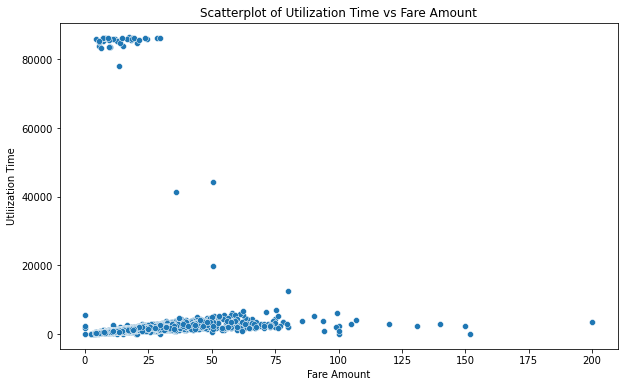

In [71]:
# 이용시간과 운임의 관계 확인

plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare_amount', y='util_time_sec', data=taxi_pre)
plt.xlabel('Fare Amount')
plt.ylabel('Utliization Time')
plt.title('Scatterplot of Utilization Time vs Fare Amount')
plt.show()

이용시간에 비해 운임이 과한 경우, 운임에 비해 이용시간이 과한 경우는 제외한다.

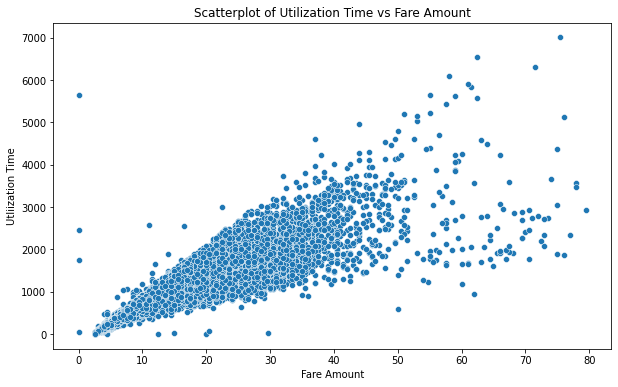

In [72]:
# util_time_sec이 10000 이상인 데이터 제거
taxi_pre = taxi_pre[(taxi_pre['util_time_sec'] < 10000)]

# fare_amount가 80 이상인 데이터 제거
taxi_pre = taxi_pre[(taxi_pre['fare_amount'] < 80)]

# 결과 확인을 위한 scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare_amount', y='util_time_sec', data=taxi_pre)
plt.xlabel('Fare Amount')
plt.ylabel('Utliization Time')
plt.title('Scatterplot of Utilization Time vs Fare Amount')
plt.show()

대체적으로 이용시간이 증가할수록 운임비용도 증가하는 것처럼 보인다.

이용시간과 거리의 상관관계도 확인해보자.

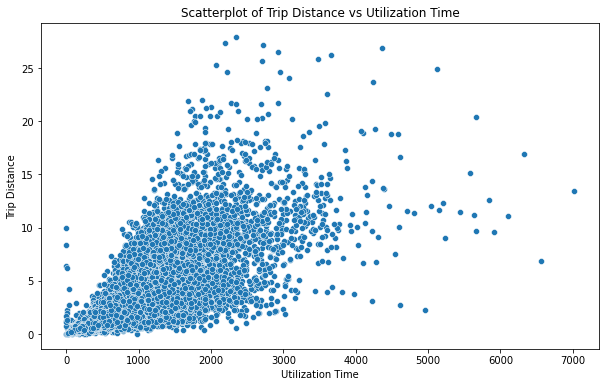

In [73]:
# 이용시간과 거리의 관계 확인

plt.figure(figsize=(10, 6))
sns.scatterplot(x='util_time_sec', y='trip_distance', data=taxi_pre)
plt.xlabel('Utilization Time')
plt.ylabel('Trip Distance')
plt.title('Scatterplot of Trip Distance vs Utilization Time')
plt.show()

마찬가지로 이용시간이 없지만 distance가 긴 경우들을 제거하자. 기준은 1분(60초)로 잡을 것이다.

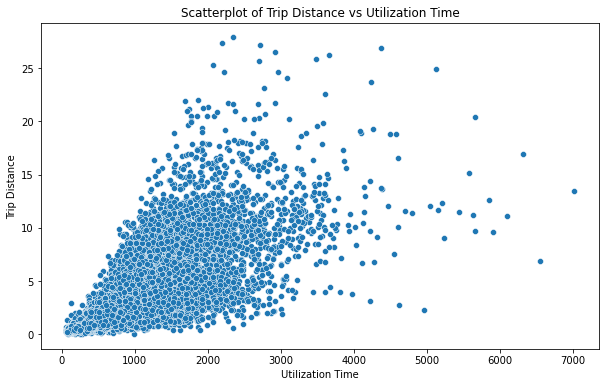

In [74]:
# utilization time이 0인 데이터 제거
taxi_pre = taxi_pre[(taxi_pre['util_time_sec'] > 60)]

# 결과 확인을 위한 scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='util_time_sec', y='trip_distance', data=taxi_pre)
plt.xlabel('Utilization Time')
plt.ylabel('Trip Distance')
plt.title('Scatterplot of Trip Distance vs Utilization Time')
plt.show()

# 정리

데이터가 어느정도 정제되었(?)으니 위에서 그렸던 그래프들을 다시 그려보자.

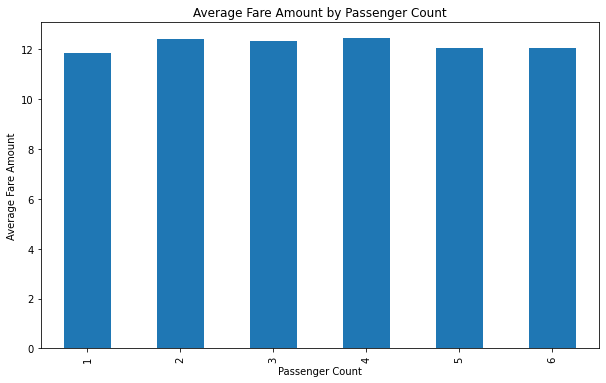

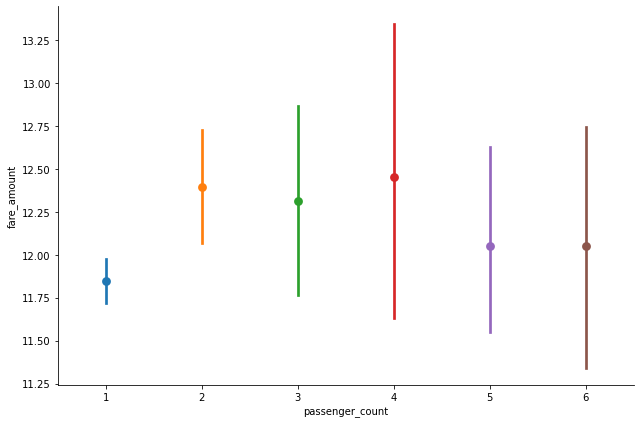

In [75]:
# passenger_count 별로 fare_amount의 평균 계산
fare_means = taxi_pre.groupby('passenger_count')['fare_amount'].mean()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
fare_means.plot(kind='bar')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Passenger Count')
plt.show()

sns.catplot(x='passenger_count', y='fare_amount', hue = 'passenger_count', data=taxi_pre, kind='point', height=6, aspect=1.5)

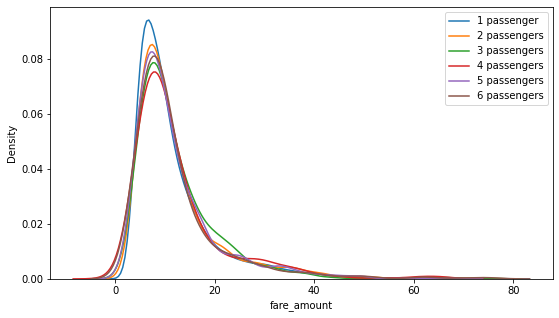

In [76]:
# 승객 수에 따른 운임 확인

fig, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 1]['fare_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 2]['fare_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 3]['fare_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 4]['fare_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 5]['fare_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['passenger_count'] == 6]['fare_amount'], ax = ax)

plt.legend(['1 passenger', '2 passengers', '3 passengers', '4 passengers', '5 passengers', '6 passengers'])
plt.show()

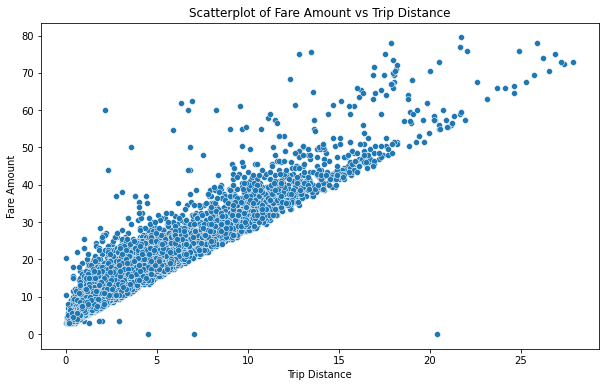

In [77]:
# 이동 거리에 따른 운임 확인

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=taxi_pre)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Scatterplot of Fare Amount vs Trip Distance')
plt.show()

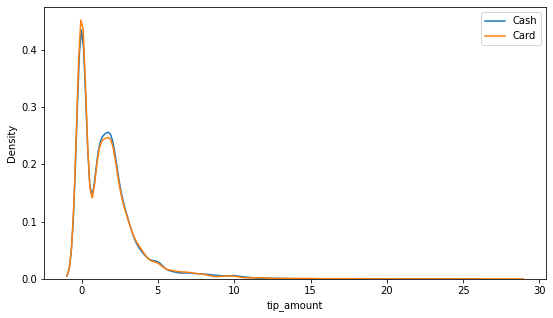

In [78]:
# 결제 수단에 따른 팁 확인

fig, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(taxi_pre[taxi_pre['payment_method'] == 'Cash']['tip_amount'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['payment_method'] == 'Card']['tip_amount'], ax = ax)

plt.legend(['Cash', 'Card'])
plt.show()

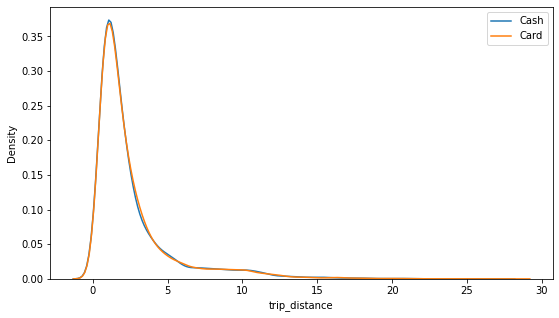

In [79]:
# 결제 수단에 따른 팁 확인

fig, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(taxi_pre[taxi_pre['payment_method'] == 'Cash']['trip_distance'], ax = ax)
sns.kdeplot(taxi_pre[taxi_pre['payment_method'] == 'Card']['trip_distance'], ax = ax)

plt.legend(['Cash', 'Card'])
plt.show()

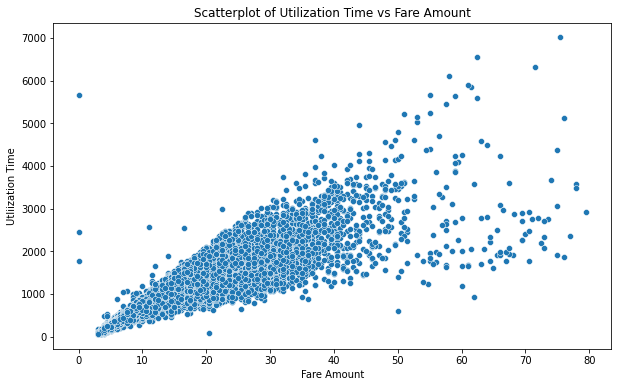

In [80]:
# 결과 확인을 위한 scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare_amount', y='util_time_sec', data=taxi_pre)
plt.xlabel('Fare Amount')
plt.ylabel('Utliization Time')
plt.title('Scatterplot of Utilization Time vs Fare Amount')
plt.show()

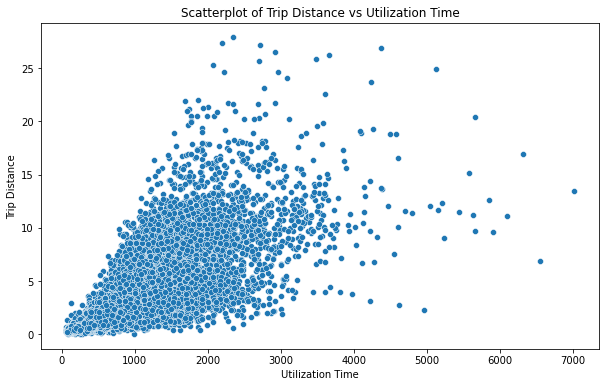

In [81]:
# 결과 확인을 위한 scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='util_time_sec', y='trip_distance', data=taxi_pre)
plt.xlabel('Utilization Time')
plt.ylabel('Trip Distance')
plt.title('Scatterplot of Trip Distance vs Utilization Time')
plt.show()

확인할 수 있는 정보와 예상결과를 비교해보자.

### <예상>
1. 승객을 많이 태울수록 운임 요금이 증가할 것이다.
2. 거리가 증가할수록 운임 요금이 증가할 것이다.
3. 거리가 증가할수록 톨비가 증가할 것이다.
4. 팁은 거래 수단과 관련이 있을 것이다. (Cash를 사용하면 팁을 줄 확률이 높다?)
5. 이용 시간(pickup 시간과 dropoff 시간의 차이)가 길수록 운임 요금이 증가할 것이다.

### <분석 결과>  
1. 승객수와 운임요금은 큰 연관관계가 없다.
2. 거리가 증가할수록 운임 요금이 증가하는 경향이 있다.
3. 거리와 톨비는 큰 연관관계가 없다.
4. 팁은 거래 수단과 연관관계가 없으며, 팁을 주는 경우 대부분 1~2만큼을 준다.
5. 이용 시간이 증가할수록 운임 요금이 증가한다.

즉, 다음과 같다.

|예측|분석 결과|
|:-|:-|
|승객 수↑ 요금↑|연관관계 X|
|거리↑ 요금↑|거리↑ 요금↑|
|거리↑ 톨비↑|연관관계 X|
|현금일경우 카드보다 더 많은 팁|연관관계 X|
|이용시간↑ 요금↑|이용시간↑ 요금↑|  

거리, 요금, 이용시간이 서로 양의 상관관계가 있는 것처럼 보인다.

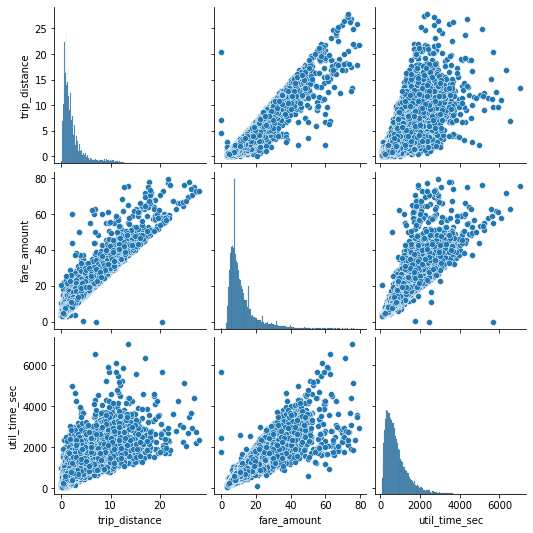

In [82]:
# pairplot을 사용하여 세 컬럼 간 관계 시각화
sns.pairplot(taxi_pre[['trip_distance', 'fare_amount', 'util_time_sec']])
plt.show()

세 데이터는 서로 양의 상관관계가 있다.

# 회고

데이터 처리에 대해 점점 배우면서 데이터 간의 상관관계를 어떻게 엮어서 분석할 수 있을지 점점 감이 오는 것 같습니다.  
도메인 지식이 있으면 어떤 것끼리 연관관계가 있을지 예측할 수 있으니, 실제 분석 결과와 비교해보는 재미도 쏠쏠하네요.  
그리고 나름대로 이상치를 제거했다고 생각했는데 여러 데이터를 비교할 때마다 계속 튀어나오는 게 약간 당황스러워요😂  
잘 분석하고 있는지, 그리고 도출된 결과에서 어떠한 비즈니스적 의사 결정을 도울 수 있을지는 아직 더 공부가 필요한 것 같습니다.  
케글 필사를 많이 하면 확실히 도움이 될 것 같아서 더 열심히 해야겠다는 생각이 드네요.  
감사합니다!